<a href="https://colab.research.google.com/github/labeduc/ciencia-de-dados/blob/main/visualizacao/LabEduc%20-%20Visualiza%C3%A7%C3%A3o%20e%20Bancos%20de%20Dados%20-%20Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banco de Dados e Pandas: Pode isso?

Quando o volume de dados é grande, e precisamos destes dados disponíveis de uma maneira mais centralizada e controlada, temos nos bancos de dados um dos nossos grandes aliados.

No entanto, até agora, não vimos como utilizar os dados de um banco de dados em visualizações. E esse será o principal objetivo deste notebook.

Portanto, iremos adquirir 2 conhecimentos importantes:
- carregar dados de um banco de dados em nosso dataframe pandas;
- utilizar um novo tipo de gráfico, chamado wordcloud (porque nunca é demais conhecer diversos tipos de gráficos).

Bora codar, cientista de dados?

## Bibliotecas Utilizadas

Aqui introduzimos o código que carrega as bibliotecas necessárias para a execução da análise.

In [6]:
# Vamos usar nossas velhas conhecidas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Biblioteca wordcloud - No google colab ela já está disponível. 
# Se for usar em seu computador, instale antes com o seguinte comando:
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  

# A biblioteca para conectar a um banco de dados sqlite
import sqlite3

# Biblioteca nativa para mexer com arquivos e diretorios no nível do sistema operacional
import os

## Carregando Variáveis de Configuração

Nesta seção fazemos a definição de variáveis de configuração, que serão usadas ao longo da análise. Aqui temos duas iniciais: a variável que contém o nome do arquivo do banco de dados, que será carregado no DataFrame pandas, e a variável que indica se precisamos fazer o download dos arquivo.

In [7]:
nome_banco = "../content/datasets/banco_dados/videogame_sales.db"
download_datasets = False   # Troque para True se você já não tem nosso diretório de datasets

# Definindo a nossa paleta de cores - vamos utilizar nossas próprias cores
cores = ["#0c4f6a", "#177498", "#0a8faa", "#bfdce5", "#82bd4a", "#b8d67a",
         "#b2b3b6", "#58585a", "#edb634", "#d97933", "#f1bdb1", "#eca091",
         "#e26c54", "#b0391e"]

## Inicializando as Configurações Globais do MatPlotLib e Seaborn

Aqui vamos deixar as configurações globais do MatPlotLib e do Seaborn.

In [8]:

# Tamanho da Imagem
# Este tamanho é em polegadas
# O primeiro valor é Largura e o segundo, Altura
plt.rcParams["figure.figsize"]=(9,5)

# Resolução da Imagem
# 300 dpi é o padrão mínimo para impressão
# Aqui vamos usar um pouco menos
plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.dpi"] = 120
plt.rcParams["savefig.format"] = "svg"

# Removendo Bordas em torno do gráfico
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False

# Carregando a paleta de cores
sns.set_palette(sns.color_palette(cores))

## Carregando os dados no DataFrame

Aqui nesta seção, iremos colocar todas as operações para carregar os dados que serão plotados. A primeira seção de código serve para carregar os arquivos de datasets.

In [9]:
if download_datasets:
  !wget https://github.com/labeduc/datasets/raw/main/banco_dados/videogame_sales.db


A segunda seção de código é a carga do DataFrame. Aqui precisamos primeiro conectar no banco de dados, conforme ensinado na aula de bancos de dados. Após a conexão, montamos nossa consulta SQL, mas em vez de executarmos como o ensinado anteriormente, utilizamos a biblioteca Pandas, com sua função **read_sql()**. Essa função executa uma consulta SQL em uma conexão e já formata o resultado como um DataFrame, ou seja, no formato longo. Esta informação é importante, pois normalmente o comando SELECT e as linguagens de programação em geral costumam retornar os dados no formato largo.

Observe também que já fizemos a consulta com o agrupamento e a totalização, evitando pelo menos um passo no nosso algoritmo. Se vocês lembram, ao carregar um arquivo, o carregamos em sua totalidade, e depois aplicamos filtros, agrupamos, etc. Aqui, o filtro e o agrupamento já é aplicado durante a leitura.

In [10]:
conexao = sqlite3.connect(nome_banco)

comando_sql = """
SELECT name, sum(global_sales) as total
FROM VideoGame_Sales
GROUP BY name
HAVING total >= 1
"""

df = pd.read_sql(comando_sql, conexao)

## Preparando os dados

Viram que fácil? Pois é, agora vamos então falar de plotar a wordcloud. Para isso, usaremos a biblioteca wordcloud em conjunto com a MatplotLib. Para isso, vamos fazer uma pequena transformação nos nossos dados. No momento, temos o nome de um game com seu total de vendas global. Por exemplo: Mario Bros - 5.1 milhoes. Precisamos transformar isso em cinco ocorrências do nome do game. Portanto, imaginando uma lista, ela ficaria assim: ["Mario Bros","Mario Bros","Mario Bros","Mario Bros","Mario Bros"].

In [11]:
lista = []
for idx, row in df.iterrows():
  lista.append(row["Name"])
  for n in range(int(row["total"])):
    lista.append(row["Name"])

text = ' '.join(lista)

## Plotando o Gráfico

Por último, fazemos a plotagem do gráfico. Observe que o gráfico gerado imprime o nome do game em um determinado tamanho, proporcional a quantidade vendida. Assim, Super Mario vendeu mais que Mario Bros e que Mario Kart.

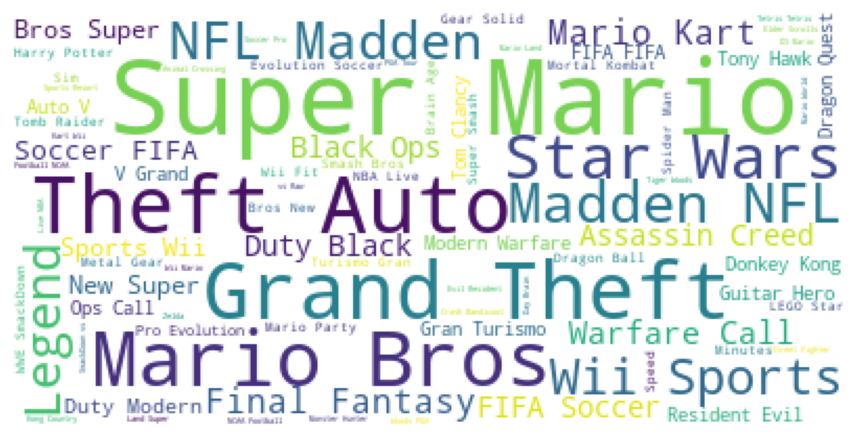

In [12]:
wordcloud = WordCloud(max_font_size=50, max_words=df.size, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Encerrando

E era isso, cientista de dados. Mais duas ferramentas para o seu bat-cinto de utilidades! 